In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import random
warnings.filterwarnings("ignore")

# Q1: Metropolis-Hastings

For the spatial part of Hydrogen atom, we can guess a wave function $\Psi_{T,\alpha} \propto e^{-\alpha r}$. So, $E_{Local}$ is equal to

$$ E_L = \frac{\hat{H}\,\Psi_{T,\alpha}}{\Psi_{T,\alpha}} = -\frac{1}{2}\left(\alpha^2 - 2\frac{\alpha}{r} \right) - \frac{1}{r}\,. $$

Now we need to calculate the best-fit value for $\alpha$. Note that there are 3 more complications here compared to the question from the last problem set.

1. $r$ here is not Cartesian but is the spatial part of spherical coordinates.

2. $E_L$ at $\alpha = 1$ becomes independent of $r$ (Spoiler: this is infact the correct answer).

3. For $\alpha \ne 1$ there's a singularity at $r = 1$ in which the potential diverges.

## (a)

Like before, write a function to preform a Metropolis-Hastings algorithm to find a distribution for $r$ at a defined $\alpha$ this time using a non-symmetric $Q(x^\prime; x)$ as discussed in the lecture.

P.S. Use two different functions for $Q$ at your choise.

In [ ]:
def Prob(r, alpha):
    return np.exp(-2 * alpha * r)

In [ ]:
def Prob_new(r):
  return Prob(r,0.25)

In [ ]:
def Q(r):
  return ( 12 * r ** 4)-(5 * r ** 2)-(2 * r)

In [ ]:
def metropolice(n, step):
  r0 = 0
  r = r0
  sample_r = []
  for i in range(n):
    r_candidate = np.random.normal(r,step)
    acceptence = (Prob_new(r_candidate)*Q(r_candidate))/(Prob_new(r)*Q(r))
    if np.random.uniform(0, 1) < acceptence:
      r = r_candidate
      sample_r.append(r)

  return np.array(sample_r)

In [ ]:
def Q2(r):
  return ( 12 * r ** 12)-(5 * r ** 2)+(7 * r ** 4)

In [ ]:
def metropolice2(n, step):
  r0 = 0
  r = r0
  sample_r = []
  for i in range(n):
    r_candidate = np.random.normal(r,step)
    acceptence = (Prob_new(r_candidate)*Q2(r_candidate))/(Prob_new(r)*Q2(r))
    if np.random.uniform(0, 1) < acceptence:
      r = r_candidate
      sample_r.append(r)

  return np.array(sample_r)

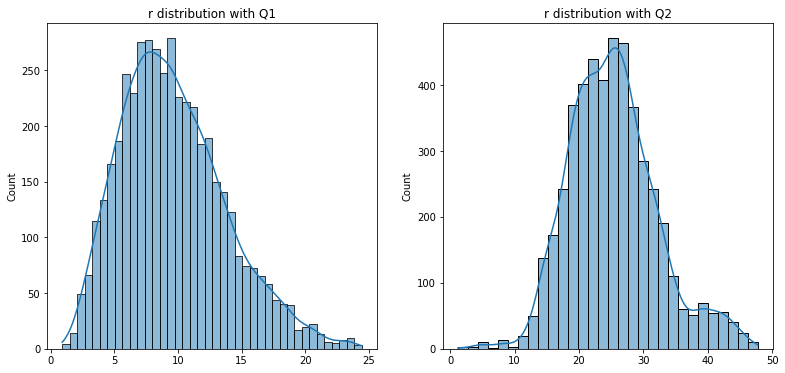

In [ ]:
plt.figure(figsize=(13,6))

r_dist = metropolice(5000,1)
plt.subplot(1,2,1)
plt.title('r distribution with Q1')
sns.histplot(r_dist,bins = 40,kde = True)

plt.subplot(1,2,2)
r_dist2 = metropolice2(5000,1)
plt.title('r distribution with Q2')
sns.histplot(r_dist2,bins = 30,kde = True)

## (b)

Plot histograms for $r$ with different sizes for each choise of $Q$ and compare them to each other and the analytical function. Which choise of $Q$ is better? Do you think there's a mathematical reason behind this?

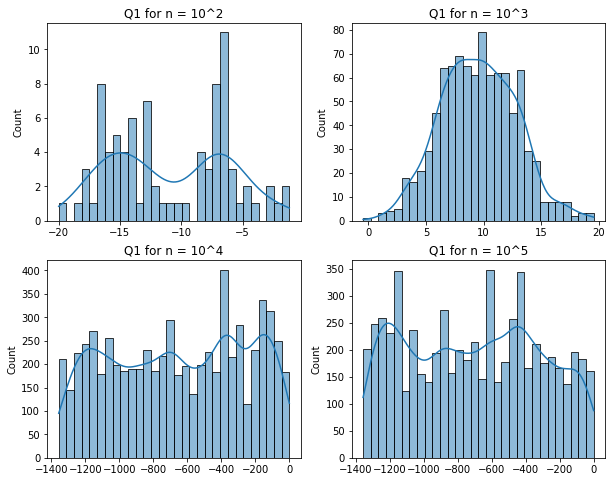

In [ ]:
Y1 = metropolice(10**2,1)
Y2 = metropolice(10**3,1)
Y3 = metropolice(10**4,1)
Y4 = metropolice(10**5,1)

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.histplot(Y1, bins =30, kde=True)
plt.title("Q1 for n = 10^2")

plt.subplot(2,2,2)
sns.histplot(Y2, bins =30, kde=True)
plt.title("Q1 for n = 10^3")

plt.subplot(2,2,3)
sns.histplot(Y3, bins =30, kde=True)
plt.title("Q1 for n = 10^4")

plt.subplot(2,2,4)
sns.histplot(Y4, bins =30, kde=True)
plt.title("Q1 for n = 10^5")

plt.show()

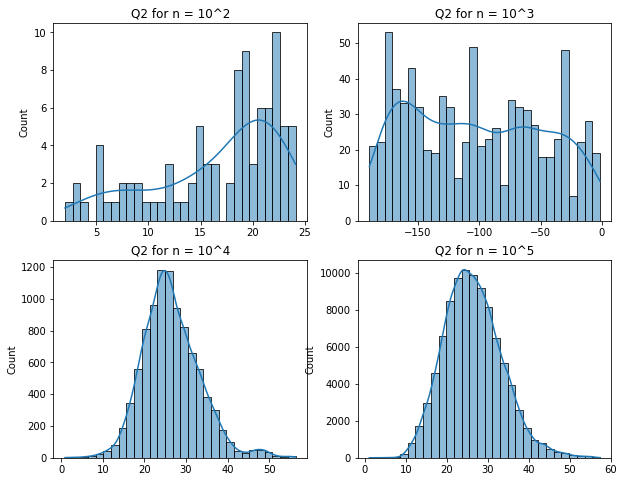

In [ ]:
y1 = metropolice2(10**2,1)
y2 = metropolice2(10**3,1)
y3 = metropolice2(10**4,1)
y4 = metropolice2(10**5,1)

plt.figure(figsize=(10,8))

plt.subplot(2,2,1)
sns.histplot(y1, bins =30, kde=True)
plt.title("Q2 for n = 10^2")

plt.subplot(2,2,2)
sns.histplot(y2, bins =30, kde=True)
plt.title("Q2 for n = 10^3")

plt.subplot(2,2,3)
sns.histplot(y3, bins =30, kde=True)
plt.title("Q2 for n = 10^4")

plt.subplot(2,2,4)
sns.histplot(y4, bins =30, kde=True)
plt.title("Q2 for n = 10^5")

plt.show()

As can be seen from the graphs, Q2 seems to work better than Q1. I think the reason is that Q2 has a term with greater even power than Q1, which means it is closer to a symmetric function.

## (c)

As before, plot $\langle E_L \rangle$ and $\sigma^2 = \langle E_L^2 \rangle - \langle E_L \rangle^2$ for different values of $\alpha$ and show that indeed $\alpha = 1$ is the best-fit value.

In [ ]:
def expected_E(alpha):
    r = metropolice(1000,1)
    E = (-1/2)*((alpha**2)-(2*alpha*(1/r)))-1/r
    return np.mean(E)
v_expected_E = np.vectorize(expected_E)

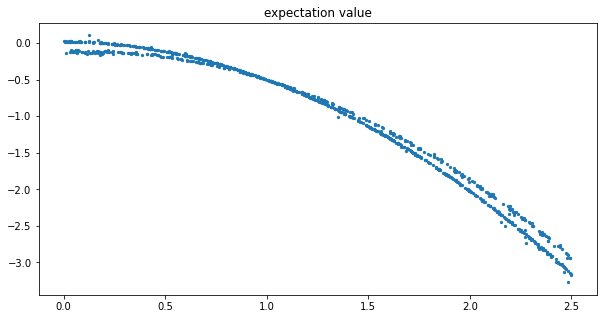

In [ ]:
a = np.random.uniform(0, 2.5, 1000)
plt.figure(figsize=(10, 5))
E = v_expected_E(a)
plt.title('expectation value')
plt.scatter(a,E,s=5)

In [ ]:
def variance_E(alpha):
    r = metropolice2(1000,1)
    E = (-1/2)*((alpha**2)-(2*alpha*(1/r)))-1/r
    return np.var(E)
v_variance_E = np.vectorize(variance_E)

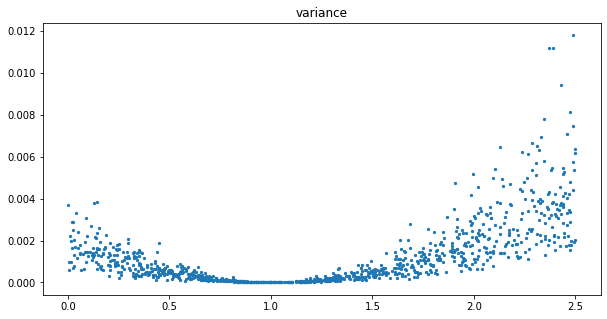

In [ ]:
a = np.random.uniform(0, 2.5, 1000)
plt.figure(figsize=(10, 5))
E = v_variance_E(a)
plt.title('variance')
plt.scatter(a,E,s=5)

According to the graph, it can be inferred that the scatter of data increases the farther we go from 1. But for a = 1 we have the lowest variance which is zero and this means that the best value for the alpha parameter is 1.